# Use Case 2: Compare Generation Methods for a Single Dataset
1. Load data
2. Generate synthetitc data using multiple generation methods
3. Compare results and determine the supirior method for the data in question

## Imports

In [ ]:
from synthesizers import Load
import matplotlib.pyplot as plt
import pandas as pd

## Load data and synthesize

In [3]:
gen_methods = ["tvae", "bayesian_network", "privbayes", "adsgan", "ctgan", "ddpm"]
result_name = "breasts_methods"

* `split_size`: Proportion of data used for training. The rest is used for testing/evaluation.
* `train_plugin`: Can take a list of plugin names that are passed to the `train_adapter` (`synthcity` by default).
* `gen_count`: Number of synthetic records to be generated.
* `n_jobs`: Numbeer of jobs to run in parallel.
* `eval_target_col`: Column name for an attribute used as the target for predictive evaluation methods.

The results are saved in a list; one element for each generation methods. To access the synthetic data for the first generation method: `state[0].synth`

In [ ]:
state = Load("mstz/breast").Synthesize(
    split_size=0.8,
    train_plugin=gen_methods,
    gen_count=1e4,
    n_jobs=len(gen_methods),
    eval_target_col="is_cancer",
)

## Read output files and compare results

In [16]:
state[2].eval

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.157165,0.004548,0.842835,0.004548
1,pca_eigval_diff,u,0.410142,NaN,0.589858,NaN
2,pca_eigvec_ang,u,0.513487,NaN,0.836552,NaN
3,avg_cio,u,0.000000,0.000000,0.000000,0.000000
4,corr_mat_diff,u,4.445633,NaN,0.901208,NaN
5,mutual_inf_diff,u,2.062750,NaN,0.954161,NaN
6,ks_tvd_stat,u,0.246611,0.065752,0.753389,0.065752
7,frac_ks_sigs,u,0.900000,NaN,0.100000,NaN
8,avg_h_dist,u,0.002576,0.002576,0.997424,0.002576
9,avg_pMSE,u,0.009406,0.000177,0.962375,0.000708


In [21]:
results = pd.DataFrame(columns=["f1_diff", "auroc_diff"])

for i in range(len(gen_methods)):
    eval = state[i].eval.set_index("metric")
    results.loc[gen_methods[i]] = [
        eval.loc["cls_F1_diff", "val"],
        eval.loc["auroc", "val"],
    ]
results

,f1_diff,auroc_diff
tvae,0.057214,0.000322
bayesian_network,0.047548,0.004513
privbayes,0.033436,0.001612
adsgan,0.004583,0.002257
ctgan,0.003224,0.000967
ddpm,0.010517,0.000322


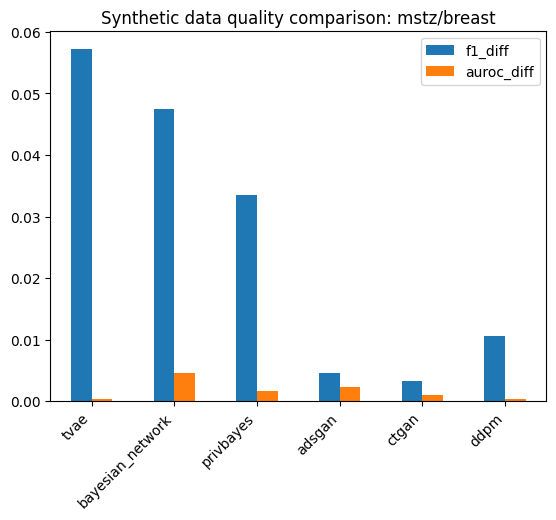

In [29]:
results.plot.bar()
plt.title("Synthetic data quality comparison: mstz/breast")
plt.xticks(rotation=45, ha="right")
plt.show()